In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt 

In [3]:
#!pip install umap-learn
import umap.umap_ as umap

In [4]:
import plotly.graph_objects as go
import plotly.express as px

In [5]:
!pip install gpy
import GPy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 959.4/959.4 KB 891.1 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... - \ done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.3/71.3 KB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
  Created wheel for gpy: filename=GPy-1.10.0-cp37-cp37m-linux_x86_64.whl size=3119594 sha256=e629b0c2c0ca922740dc38c7947d1abdd6ba450419b8d21e79b9679788fcaeaf
  Stored in directory: /root/.cache/pip/wheels/f7/18/28/dd1ce0192a81b71a3b086fd952511d088b21e8359ea496860a
  Created wheel for paramz: filename=paramz-0.9.5-py3-none-any.whl size=102566 sha256=c9e7a7302673109dbfdd3e67345f38ac262112909e544a5cce61f22ac6cba955
  Stored in directory: /root/.cache/pip/wheels/c8/95/f5/ce28482da28162e6028c4b3a32c41d147395825b3cd62bc810
Successfully built gpy paramz


In [6]:
from sklearn.metrics import confusion_matrix, accuracy_score 

In [7]:
import cv2
!pip3 install opencv-contrib-python
!pip3 install opencv-python

In [8]:
!pip install Augmentor
import Augmentor

In [9]:
import shutil

# The data

In [10]:
# shutil.copytree('../input/corrosion/train', './aug')
# p = Augmentor.Pipeline("./aug")
# p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
# p.zoom(probability=0.3, min_factor=1.1, max_factor=1.6)
# p.sample(1000)

In [11]:
# !ls ./aug

In [12]:
images_train = [];
images_test = [];
labels_train = [];
labels_test = [];
image_filenames_train = [];
image_filenames_test = [];

directory = '../input/corrosion/train'
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    # checking if it is a file
    if os.path.isfile(f):
        #print(f)
        if f.endswith('.jpg') and ~f.endswith('a.jpg'):
            img = cv2.imread(f,0)
            images_train.append(img)  
            image_filenames_train.append(f)
            if filename.startswith('norust'):
                #print("no rust")
                labels_train.append(0)
            else:
                #print("rust")
                labels_train.append(1)

directory = '../input/corrosion/test'
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    # checking if it is a file
    if os.path.isfile(f):
        #print(f)
        if f.endswith('.jpg') and ~f.endswith('a.jpg'):
            img = cv2.imread(f,0)
            images_test.append(img)  
            image_filenames_test.append(f)
            if filename.startswith('norust'):
                labels_test.append(0)
            else:
                labels_test.append(1)        
            
#some checks

print("images_train ", len(images_train))
print("labels_train", len(labels_train))
print("image_filenames_train", len(image_filenames_train))

print("images_test ", len(images_test))
print("labels_test", len(labels_test))
print("image_filenames_test", len(image_filenames_test))

images_train  101
labels_train 101
image_filenames_train 101
images_test  30
labels_test 30
image_filenames_test 30


In [13]:
%whos

Variable                Type        Data/Info
---------------------------------------------
Augmentor               module      <module 'Augmentor' from <...>s/Augmentor/__init__.py'>
GPy                     module      <module 'GPy' from '/opt/<...>ackages/GPy/__init__.py'>
accuracy_score          function    <function accuracy_score at 0x7fd7217e0560>
confusion_matrix        function    <function confusion_matrix at 0x7fd7217e05f0>
cv2                     module      <module 'cv2' from '/opt/<...>ackages/cv2/__init__.py'>
directory               str         ../input/corrosion/test
f                       str         ../input/corrosion/test/rust.5a.jpg
filename                str         rust.5a.jpg
go                      module      <module 'plotly.graph_obj<...>aph_objects/__init__.py'>
image_filenames_test    list        n=30
image_filenames_train   list        n=101
images_test             list        n=30
images_train            list        n=101
img                     ndarray 

random train image  0
NO rust
../input/corrosion/train/norust.60a.jpg
<class 'numpy.ndarray'>
(225, 225)


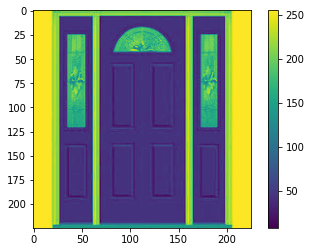

In [14]:
nr_of_random_train_image = 0
print("random train image ", nr_of_random_train_image)
if labels_train[nr_of_random_train_image] == 0:
    print("NO rust")
else:
    print("Rust")
print(image_filenames_train[nr_of_random_train_image])
plt.imshow(images_train[nr_of_random_train_image])
plt.colorbar()   #Puts a color bar next to the image. 
print(type(images_train[nr_of_random_train_image]))
#print(images_train[nr_of_random_train_image])
print(images_train[nr_of_random_train_image].shape)

random test image  5
Rust
../input/corrosion/train/norust.54a.jpg
<class 'numpy.ndarray'>
(340, 453)


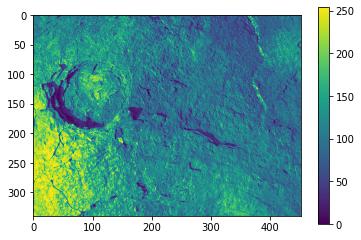

In [15]:
nr_of_random_test_image = 5
print("random test image ", nr_of_random_test_image)
if labels_test[nr_of_random_test_image] == 0:
    print("NO rust")
else:
    print("Rust")
print(image_filenames_train[nr_of_random_test_image])
plt.imshow(images_test[nr_of_random_test_image])
plt.colorbar()   #Puts a color bar next to the image. 
print(type(images_test[nr_of_random_test_image]))
#print(images_test[nr_of_random_train_image])
print(images_test[nr_of_random_test_image].shape)

(94, 128)
[[ 0.  0.  0. ...  2.  1.  1.]
 [ 0. 13. 96. ...  0.  0.  4.]
 [49.  3.  0. ... 10.  8. 27.]
 ...
 [72.  2.  1. ...  0.  0.  0.]
 [ 1.  2.  0. ...  0.  0.  0.]
 [ 0.  2.  1. ...  0.  0.  0.]]


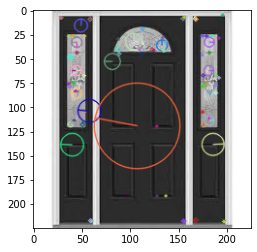

In [16]:
sift = cv2.SIFT_create() #https://docs.opencv.org/4.x/da/df5/tutorial_py_sift_intro.html
kp, des = sift.detectAndCompute(images_train[nr_of_random_train_image],None)
print(des.shape)
print(des)
img=cv2.drawKeypoints(images_train[nr_of_random_train_image],kp, images_train[nr_of_random_train_image], flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(img)

(1489, 128)
[[ 57.  28.   6. ...   3.   1.   0.]
 [ 60.  34.  40. ...   6.   1.   0.]
 [ 52.  39.   1. ...  19.   9.  28.]
 ...
 [101. 126.  13. ...   0.   0.   0.]
 [  0.   0.   0. ...  21.   1.   2.]
 [ 29. 134.  64. ...   0.   0.   0.]]


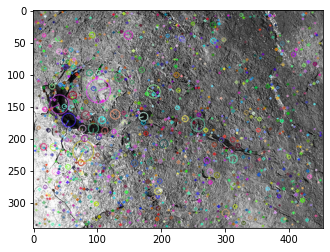

In [17]:
sift = cv2.SIFT_create() #https://docs.opencv.org/4.x/da/df5/tutorial_py_sift_intro.html
kp, des = sift.detectAndCompute(images_test[nr_of_random_test_image],None)
print(des.shape)
print(des)
img=cv2.drawKeypoints(images_test[nr_of_random_test_image],kp, images_test[nr_of_random_test_image], flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(img)

In [18]:
des_list_train = [];
for i in range(len(images_train)):
    kp, des = sift.detectAndCompute(images_train[i],None)
    #print(des.shape)
    des_list_train.append((image_filenames_train[i], des)) 
descriptors_train = des_list_train[0][1];
for image_path, descriptor in des_list_train[1:]:
    descriptors_train = np.vstack((descriptors_train, descriptor))  

In [19]:
descriptors_train_float = descriptors_train.astype(float)  

In [20]:
from scipy.cluster.vq import kmeans, vq
k = 128
voc, variance = kmeans(descriptors_train_float, k, 1) 

In [21]:
# Calculate the histogram of features and represent them as vector
#vq Assigns codes from a code book to observations.
im_features_train = np.zeros((len(image_filenames_train), k), "float32")
for i in range(len(image_filenames_train)):
    words, distance = vq(des_list_train[i][1],voc)
    for w in words:
        im_features_train[i][w] += 1

In [22]:
# Perform Tf-Idf vectorization
nbr_occurences = np.sum( (im_features_train > 0) * 1, axis = 0)
idf = np.array(np.log((1.0*len(image_filenames_train)+1) / (1.0*nbr_occurences + 1)), 'float32')

In [23]:
# Scaling the words
#Standardize features by removing the mean and scaling to unit variance
#In a way normalization
from sklearn.preprocessing import StandardScaler
stdSlr = StandardScaler().fit(im_features_train)
im_features_train = stdSlr.transform(im_features_train)

In [24]:
im_features_train.shape

(101, 128)

# UMAP

In [25]:
reducer = umap.UMAP(random_state=5,n_components=2, n_neighbors=50)
reducer.fit(im_features_train)

UMAP(n_neighbors=50, random_state=5, tqdm_kwds={'bar_format': '{desc}: {percentage:3.0f}%| {bar} {n_fmt}/{total_fmt} [{elapsed}]', 'desc': 'Epochs completed', 'disable': True})

In [26]:
embedding_train = reducer.transform(im_features_train)
assert(np.all(embedding_train == reducer.embedding_))
embedding_train.shape

(101, 2)

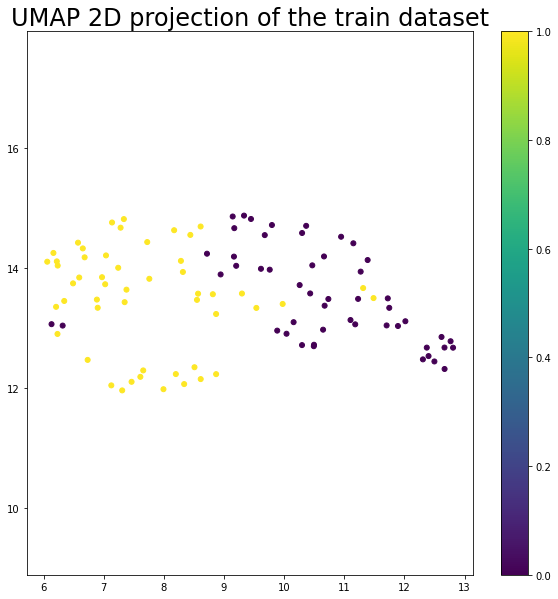

In [27]:
plt.figure(figsize=(10,10))
plt.scatter(embedding_train[:, 0], embedding_train[:, 1], c=labels_train, s=25)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar()#boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('UMAP 2D projection of the train dataset', fontsize=24);


In [28]:
# fig = go.Figure(data=[go.Scatter3d(x=embedding_train[:, 0], y=embedding_train[:, 1], z=embedding_train[:, 2],
#                                    mode='markers',
#                                    marker=dict(size=10,
#                                                color=labels_train,
#                                                colorbar=dict(thickness=10),
#                                                opacity=0.5)
#                                    )])
# fig.update_layout(
#     autosize=False,
#     width=1000,
#     height=1000,
#     )

# fig.show()

# GP

In [29]:
def plot_gp(X, m, C, training_points=None):
    """ Plotting utility to plot a GP fit with 95% confidence interval """
    # Plot 95% confidence interval 
    plt.fill_between(X[:,0],
                     m[:,0] - 1.96*np.sqrt(np.diag(C)),
                     m[:,0] + 1.96*np.sqrt(np.diag(C)),
                     alpha=0.5)
    # Plot GP mean and initial training points
    plt.plot(X, m, "-")
    plt.legend(labels=["GP fit"])
    
    plt.xlabel("x"), plt.ylabel("f")
    
    # Plot training points if included
    if training_points is not None:
        X_, Y_ = training_points
        plt.plot(X_, Y_, "kx", mew=2)
        plt.legend(labels=["GP fit", "sample points"])

In [30]:
X = embedding_train
X.shape

(101, 2)

In [31]:
y = np.array(labels_train)[:,None]
y.shape

(101, 1)

In [32]:
# kernel = GPy.kern.RBF(3, active_dims=[0, 1, 2], ARD=True)
kernel = GPy.kern.RBF(2, active_dims=[0, 1], ARD=True)
probit = GPy.likelihoods.link_functions.Probit()
B_dist  = GPy.likelihoods.Bernoulli(gp_link=probit)

# We'll use Laplace approximation here
m = GPy.core.GP( # Note that we are using the core GP model here, which allows us 
    X, y,        # .. to tailor the inference and likelihood, instead of the default
    kernel = kernel,  #  .. GP regression model used previously
    inference_method = GPy.inference.latent_function_inference.Laplace(), # Laplace approximation for inference
    likelihood = B_dist
)

m.optimize(messages=True, max_iters=200)


In [33]:
# Our test grid
#Xi, Xj] = np.meshgrid(np.linspace(-5,5, 100), np.linspace(-5,5, 100))
min_x = min(embedding_train[:,0])
min_y = min(embedding_train[:,1])
max_x = max(embedding_train[:,0])
max_y = max(embedding_train[:,1])
[Xi, Xj] = np.meshgrid(np.linspace(min_x-2,max_x+2, 100), np.linspace(min_y-2,max_y+2, 100))
Xnew2 = np.vstack((Xi.ravel(), Xj.ravel())).T # Change our input grid to list of coordinates

# We plot the latent function without the likelihood
#   This is equivalent to predict_noiseless in the previous lab
mean2, Cov2 = m.predict(Xnew2, include_likelihood=False, full_cov=True)


# We will also predict the median and 95% confidence intervals of the likelihood
quantiles = m.predict_quantiles(Xnew2, quantiles=np.array([50.]), likelihood=m.likelihood)
prob, _ = m.predict(Xnew2, include_likelihood=True)

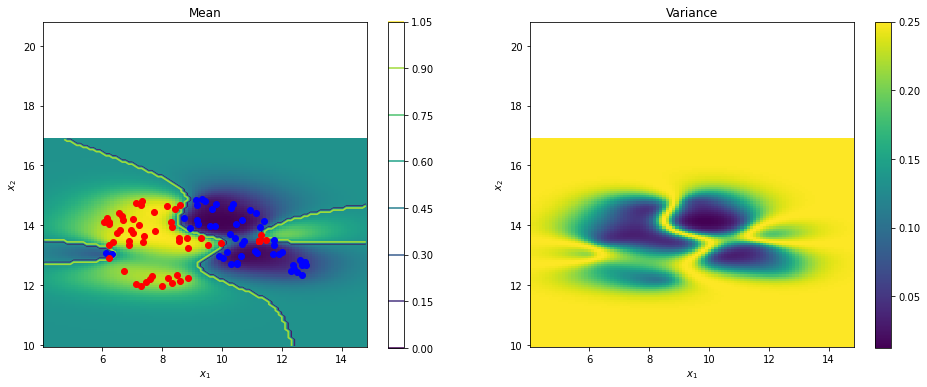

In [34]:
# Prepare figure environment
plt.figure(figsize=(16,6))

####
plt.subplot(121)

# # Plot the median of the predicted likelihood
plt.pcolor(Xi, Xj, prob.reshape(Xi.shape)) # (a)
plt.contour(Xi,Xj,quantiles[0].reshape(Xi.shape)) # (b)

# plt.plot(X, y, "kx", mew=2)
plt.plot(X[np.where(y == 0),0],X[np.where(y == 0),1],'bo')
plt.plot(X[np.where(y == 1),0],X[np.where(y == 1),1],'ro')

# Annotate plot
plt.xlabel("$x_1$"), plt.ylabel("$x_2$")
plt.axis("square")
plt.title("Mean")
plt.colorbar();

#====
plt.subplot(122)
# We can extract the variance from our mean function estimation of the Bernoulli distribution. 
plt.pcolor(Xi, Xj, (prob*(1.-prob)).reshape(Xi.shape)) # (c)

# Annotate plot
plt.xlabel("$x_1$"), plt.ylabel("$x_2$")
plt.title("Variance")
plt.axis("square")
plt.colorbar();

# Test

In [35]:
des_list_test = [];
for i in range(len(images_test)):
    kp, des = sift.detectAndCompute(images_test[i],None)
    #print(des.shape)
    des_list_test.append((image_filenames_test[i], des)) 
descriptors_test = des_list_test[0][1];
for image_path, descriptor in des_list_test[1:]:
    descriptors_test = np.vstack((descriptors_test, descriptor))  

In [36]:
descriptors_test_float = descriptors_test.astype(float)  

In [37]:
%whos

Variable                   Type              Data/Info
------------------------------------------------------
Augmentor                  module            <module 'Augmentor' from <...>s/Augmentor/__init__.py'>
B_dist                     Bernoulli           Bernoulli.  |<...>|  constraints  |  priors
Cov2                       ndarray           10000x10000: 100000000 elems, type `float64`, 800000000 bytes (762.939453125 Mb)
GPy                        module            <module 'GPy' from '/opt/<...>ackages/GPy/__init__.py'>
StandardScaler             type              <class 'sklearn.preproces<...>ng._data.StandardScaler'>
X                          ndarray           101x2: 202 elems, type `float32`, 808 bytes
Xi                         ndarray           100x100: 10000 elems, type `float64`, 80000 bytes
Xj                         ndarray           100x100: 10000 elems, type `float64`, 80000 bytes
Xnew2                      ndarray           10000x2: 20000 elems, type `float64`, 160000 b

In [38]:
# Calculate the histogram of features and represent them as vector
#vq Assigns codes from a code book to observations.
im_features_test = np.zeros((len(image_filenames_test), k), "float32")
for i in range(len(image_filenames_test)):
    words, distance = vq(des_list_test[i][1],voc)
    for w in words:
        im_features_test[i][w] += 1

In [39]:
# Perform Tf-Idf vectorization
nbr_occurences = np.sum( (im_features_test > 0) * 1, axis = 0)
idf = np.array(np.log((1.0*len(image_filenames_test)+1) / (1.0*nbr_occurences + 1)), 'float32')

In [40]:
# Scaling the words
im_features_test = stdSlr.transform(im_features_test)

In [41]:
im_features_test.shape

(30, 128)

In [42]:
embedding_test = reducer.transform(im_features_test)
#assert(np.all(embedding_test == reducer.embedding_))
embedding_test.shape

(30, 2)

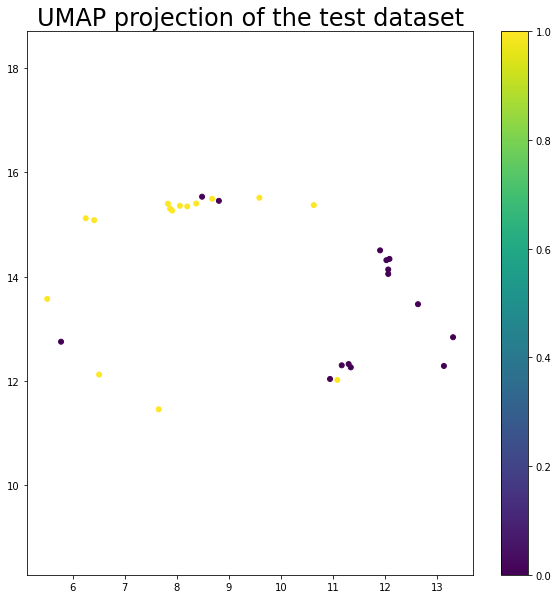

In [43]:
plt.figure(figsize=(10,10))
plt.scatter(embedding_test[:, 0], embedding_test[:, 1], c=labels_test, s=25)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar()#boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('UMAP projection of the test dataset', fontsize=24);

In [44]:
X_test = embedding_test
X_test.shape

(30, 2)

In [45]:
y_test = np.array(labels_test)[:,None]
y_test.shape

(30, 1)

In [46]:
mean_test, Cov_test = m.predict(X_test)
print(mean_test[0:5,:])

[[0.75897802]
 [0.29792409]
 [0.2833266 ]
 [0.32680209]
 [0.55592126]]


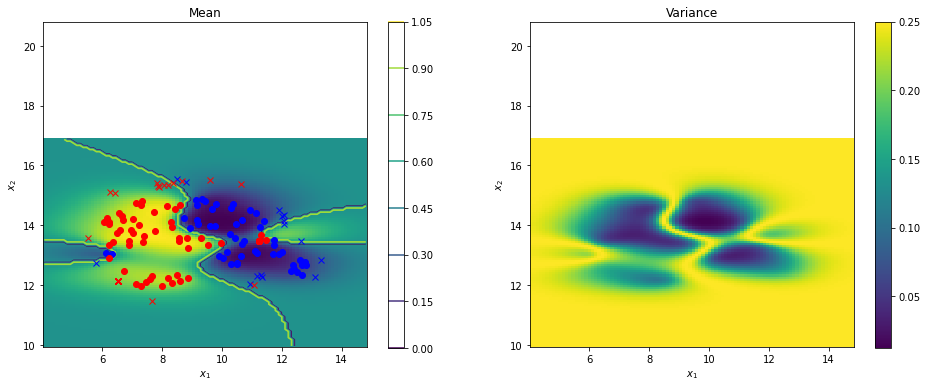

In [47]:
# Prepare figure environment
plt.figure(figsize=(16,6))

####
plt.subplot(121)

# # Plot the median of the predicted likelihood
plt.pcolor(Xi, Xj, prob.reshape(Xi.shape)) # (a)
plt.contour(Xi,Xj,quantiles[0].reshape(Xi.shape)) # (b)

# plt.plot(X, y, "kx", mew=2)
plt.plot(X[np.where(y == 0),0],X[np.where(y == 0),1],'bo')
plt.plot(X[np.where(y == 1),0],X[np.where(y == 1),1],'ro')
plt.plot(X_test[np.where(y_test == 0),0],X_test[np.where(y_test == 0),1],'bx')
plt.plot(X_test[np.where(y_test == 1),0],X_test[np.where(y_test == 1),1],'rx')

# Annotate plot
plt.xlabel("$x_1$"), plt.ylabel("$x_2$")
plt.axis("square")
plt.title("Mean")
plt.colorbar();

#====
plt.subplot(122)
# We can extract the variance from our mean function estimation of the Bernoulli distribution. 
plt.pcolor(Xi, Xj, (prob*(1.-prob)).reshape(Xi.shape)) # (c)

# Annotate plot
plt.xlabel("$x_1$"), plt.ylabel("$x_2$")
plt.title("Variance")
plt.axis("square")
plt.colorbar();

# Confusion matrix

In [48]:
print(mean_test[0:5]) #sanity check

[[0.75897802]
 [0.29792409]
 [0.2833266 ]
 [0.32680209]
 [0.55592126]]


In [49]:
#Report true class names so they can be compared with predicted classes
true_class =  labels_test
# Perform the predictions and report predicted class names. 
predictions =  mean_test.flatten()
predictions = np.round(predictions)
predictions = predictions.astype(int)

print(true_class)
print(predictions)

[1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1]
[1 0 0 0 1 1 1 0 1 0 1 1 0 0 0 1 0 1 1 0 1 0 0 1 0 0 0 0 1 1]


In [50]:
def showconfusionmatrix(cm):
    plt.matshow(cm)
    plt.title('Confusion matrix')
    plt.colorbar()
    plt.show()

accuracy =  0.7666666666666667
[[12  3]
 [ 4 11]]


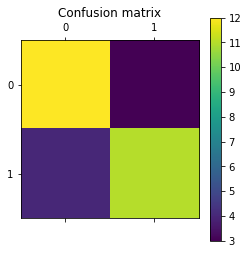

In [51]:
accuracy = accuracy_score(true_class, predictions)
print ("accuracy = ", accuracy)
cm = confusion_matrix(true_class, predictions)
print (cm)

showconfusionmatrix(cm)

nr of correctly identified  0  file:  ../input/corrosion/test/rust.0.jpg
nr of correctly identified  1  file:  ../input/corrosion/test/norust.42.jpg
nr of correctly identified  2  file:  ../input/corrosion/test/norust.43.jpg
nr of correctly identified  3  file:  ../input/corrosion/test/norust.13.jpg
nr of correctly identified  5  file:  ../input/corrosion/test/rust.10.jpg


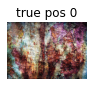

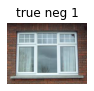

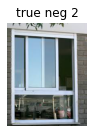

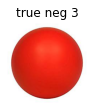

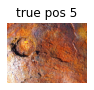

In [52]:
import PIL
%matplotlib inline
cnt = 1;
for i in range(6):
#     print(i)
    s = ""
    if true_class[i] == 1 and predictions[i] == 1:
        s = "true pos"
    elif true_class[i] == 0 and predictions[i] == 0:
        s = "true neg"
    if s != "":
        print("nr of correctly identified ", i, " file: ", image_filenames_test[i])
        img = PIL.Image.open(image_filenames_test[i])
        plt.figure(figsize=(10, 6))
        plt.subplot(1,6,cnt)
        plt.title(s + " " + str(i))
        plt.axis('off')
        plt.imshow(img)
        cnt +=1

nr of falsely identified  4  file:  ../input/corrosion/test/norust.14.jpg
nr of falsely identified  6  file:  ../input/corrosion/test/norust.41.jpg
nr of falsely identified  7  file:  ../input/corrosion/test/rust.11.jpg
nr of falsely identified  9  file:  ../input/corrosion/test/rust.6.jpg
nr of falsely identified  16  file:  ../input/corrosion/test/rust.11a.jpg
nr of falsely identified  18  file:  ../input/corrosion/test/norust.2.jpg
nr of falsely identified  19  file:  ../input/corrosion/test/rust.4.jpg


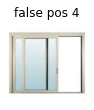

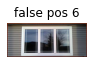

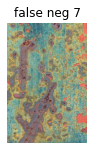

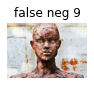

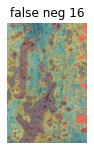

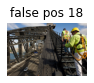

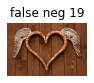

In [53]:
import PIL
%matplotlib inline
cnt = 1;
for i in range(len(true_class)):
#     print(i)
    s = ""
    if true_class[i] == 0 and predictions[i] == 1:
        #print("This is not rust but was mistaken as rust")
        s = "false pos"
    elif true_class[i] == 1 and predictions[i] == 0:
        #print("This is rust but was not detected as such")
        s = "false neg"
    if s != "":
        print("nr of falsely identified ", i, " file: ", image_filenames_test[i])
        img = PIL.Image.open(image_filenames_test[i])
        plt.figure(figsize=(10, 6))
        plt.subplot(2,6,cnt)
        plt.title(s + " " + str(i))
        plt.axis('off')
        plt.imshow(img)
        cnt +=1